In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 100

In [3]:
# reading the train and test csv files 

In [4]:
raw_data = pd.read_csv('Wholesale customers data.csv')

In [5]:
# some goofing around the raw data 

In [6]:
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [54]:
raw_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [21]:
raw_data['Region'].nunique()    # target is to classify according to these data 

3

In [22]:
#visualizations 

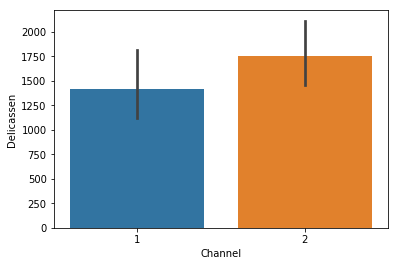

In [31]:
sns.barplot('Channel','Delicassen',data=raw_data)

In [ ]:
# some insights wrt channel 
#---> fresh and frozen are more in channel 1 
#----> milk , grocery , detergent is more in channel 2 
# ---> delicassen is utilized approx equally by both channels 

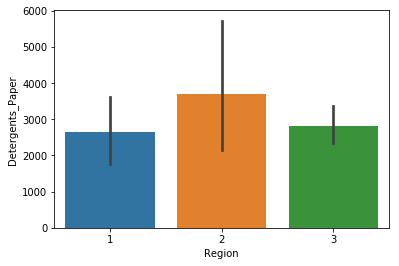

In [46]:
sns.barplot('Region','Detergents_Paper',data=raw_data)

In [ ]:
# some insights wrt region
#---> fresh,milk,delicassen are more in region 3 
#---->grocery , detergent is more in region 2 

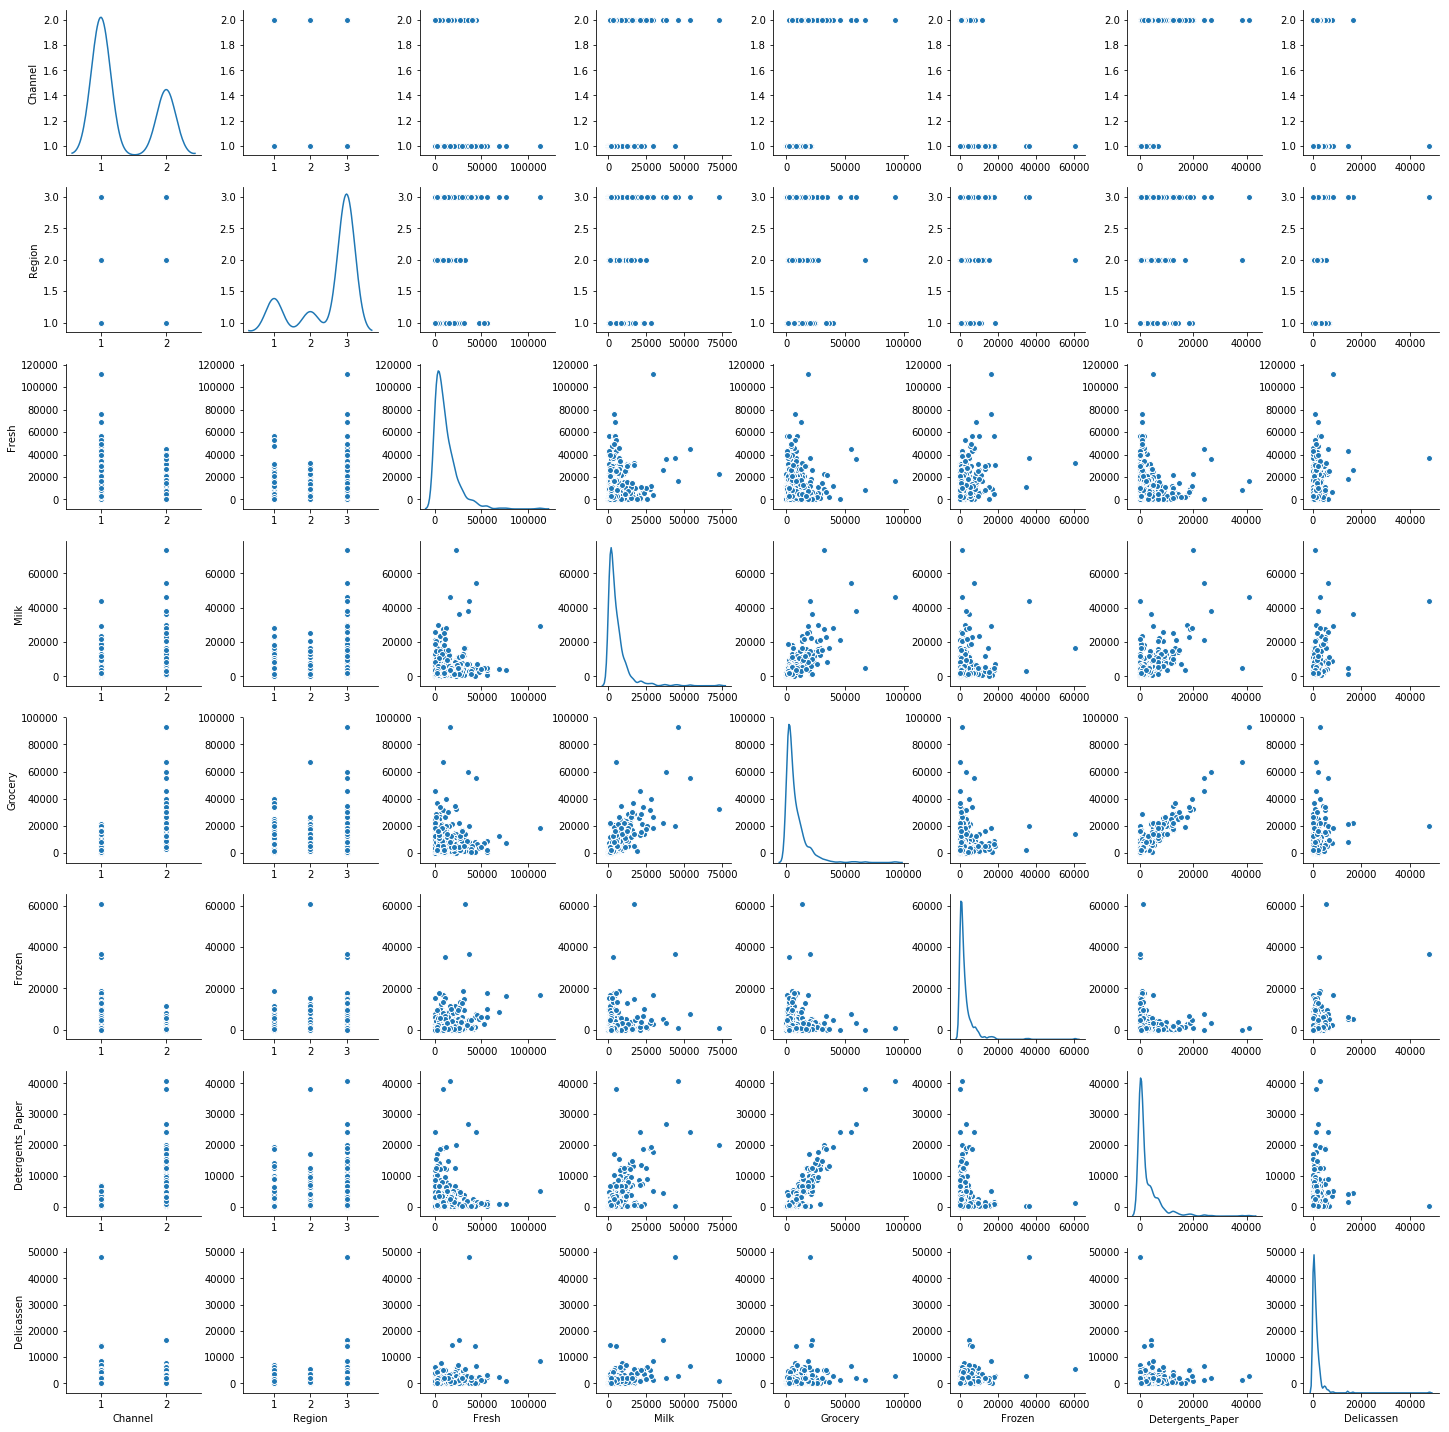

In [53]:
sns.pairplot(raw_data,diag_kind='kde')

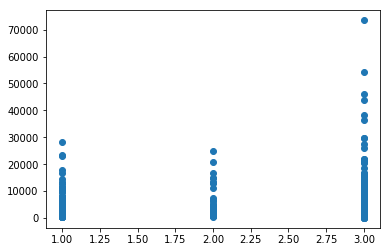

In [52]:
plt.scatter(x='Region',y='Milk',data=raw_data)

In [ ]:
# vizualisation has given some info . outliers are present as well 

In [ ]:
# algorithms -- KNN with gradient descent (prelim)
#               SVM and neural networks 

In [ ]:
# KNN 

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
from sklearn.cross_validation import train_test_split

In [159]:
#differentiating the target feature from the dataset

In [160]:
raw_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [161]:
X = raw_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = raw_data.loc[:,'Region']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [163]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [164]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [165]:
predictions = neigh.predict(X_test)

In [168]:
for K in range(25):
     K_value = K+1
     neigh1 = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
     neigh1.fit(X_train, y_train) 
     y_pred = neigh1.predict(X_test)
     print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  59.0909090909 % for K-Value: 1
Accuracy is  40.9090909091 % for K-Value: 2
Accuracy is  61.3636363636 % for K-Value: 3
Accuracy is  57.9545454545 % for K-Value: 4
Accuracy is  64.7727272727 % for K-Value: 5
Accuracy is  68.1818181818 % for K-Value: 6
Accuracy is  72.7272727273 % for K-Value: 7
Accuracy is  73.8636363636 % for K-Value: 8
Accuracy is  75.0 % for K-Value: 9
Accuracy is  76.1363636364 % for K-Value: 10
Accuracy is  76.1363636364 % for K-Value: 11
Accuracy is  76.1363636364 % for K-Value: 12
Accuracy is  77.2727272727 % for K-Value: 13
Accuracy is  77.2727272727 % for K-Value: 14
Accuracy is  77.2727272727 % for K-Value: 15
Accuracy is  77.2727272727 % for K-Value: 16
Accuracy is  77.2727272727 % for K-Value: 17
Accuracy is  77.2727272727 % for K-Value: 18
Accuracy is  77.2727272727 % for K-Value: 19
Accuracy is  77.2727272727 % for K-Value: 20
Accuracy is  77.2727272727 % for K-Value: 21
Accuracy is  77.2727272727 % for K-Value: 22
Accuracy is  77.2727272727 %

In [190]:
# scoring 

In [79]:
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score,precision_score

In [192]:
confusion_matrix(y_test,predictions)

array([[ 3,  1, 13],
       [ 0,  1,  5],
       [16,  1, 48]], dtype=int64)

In [193]:
mean_squared_error(y_test,predictions)

1.3977272727272727

In [194]:
accuracy_score(y_test,predictions)

0.59090909090909094

In [ ]:
# ------------------------------------------------------for channel grouping 

In [141]:
X = raw_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = raw_data.loc[:,'Channel']

In [166]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [167]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [168]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [169]:
predictions = neigh.predict(X_test)

In [170]:
mean_squared_error(y_test,predictions)

0.11363636363636363

In [171]:
accuracy_score(y_test,predictions) # grouping according to the channel (similar to predicitng though )

0.88636363636363635

In [195]:
# neural networks

In [88]:
from sklearn.neural_network import MLPClassifier

In [89]:
mlp = MLPClassifier()

In [199]:
X = raw_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = raw_data.loc[:,'Region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [200]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [201]:
neuralpredict = mlp.predict(X_test)

In [203]:
mean_squared_error(y_test,neuralpredict)

1.0795454545454546

In [204]:
accuracy_score(y_test,neuralpredict)

0.60227272727272729

In [99]:
from sklearn.svm import SVC

In [212]:
clf = SVC()

In [213]:
X = raw_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
y = raw_data.loc[:,'Region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [215]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [216]:
predi = clf.predict(X_test)

In [217]:
accuracy_score(y_test,predi)

0.72727272727272729

In [225]:
clf.score(X_test,y_test)

0.72727272727272729

In [1]:
# to implement feature scaling 

In [5]:
raw_data.columns 

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [12]:
X = raw_data.drop(labels='Region',axis=1) # dripping the target region column 

In [13]:
X.columns 

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [14]:
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


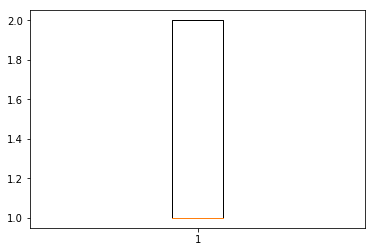

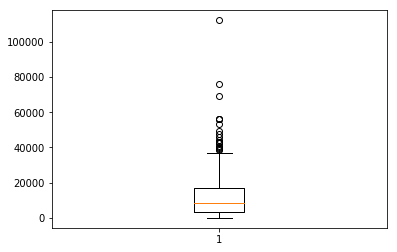

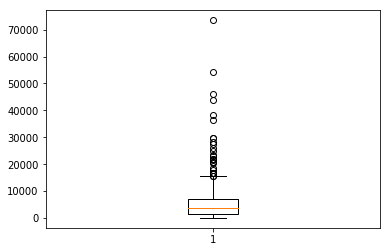

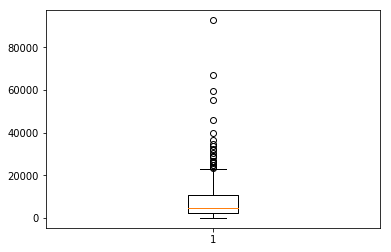

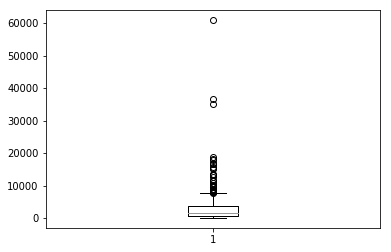

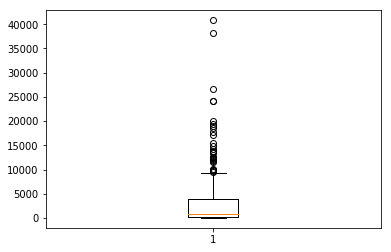

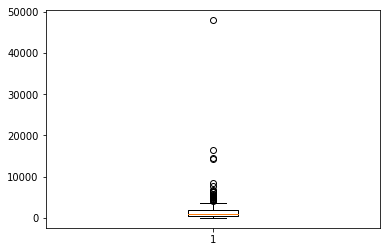

In [16]:
# outlier count is more .. 
for n in X.columns:
    plt.boxplot(X[n]);
    plt.show();

In [17]:
# scaling the data  

In [7]:
df1 = raw_data[raw_data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print (df1)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
6          2       3  12126   3199     6975     480              3140   
7          2       3   7579   4956     9426    1669              3321   
8          1       3   5963   3648     6192     425              1716   
9          2       3   6006  11093    18881    1159              7425   
10         2       3   3366   5403    12974    4400              5977   
11         2       3  13146   1124     4523    1420               549   
12         2       3  31714  12319    11757     287

In [143]:
df1.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.314010,2.548309,10711.758454,4871.920290,6814.043478,2549.898551,2373.393720,1237.939614
std,0.464682,0.769475,9819.217756,4555.665546,6456.160715,2916.683284,3208.707909,1217.399162
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3063.250000,1477.750000,2116.000000,676.750000,252.750000,395.000000
50%,1.000000,3.000000,8040.000000,3530.000000,4528.000000,1447.000000,772.000000,881.000000
75%,2.000000,3.000000,15657.000000,6908.500000,9762.250000,3204.250000,3660.500000,1681.750000
max,2.000000,3.000000,49063.000000,25862.000000,34792.000000,16919.000000,17120.000000,7844.000000


In [8]:
df1y = df1['Region']
df1 = df1.drop(labels='Region',axis=1)

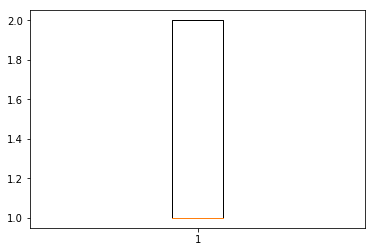

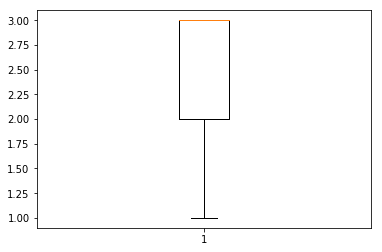

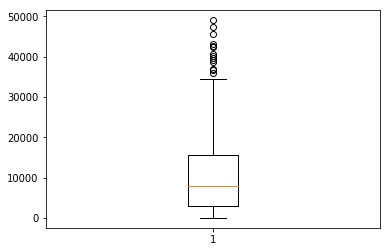

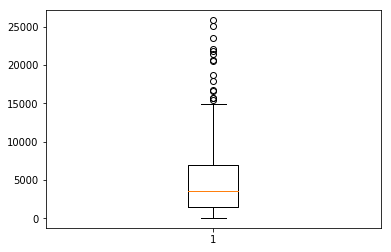

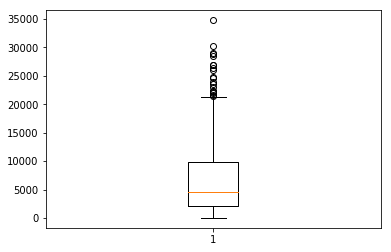

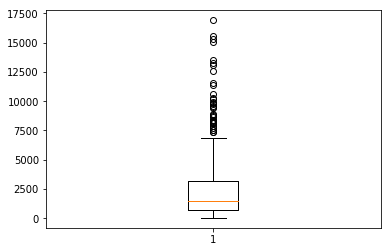

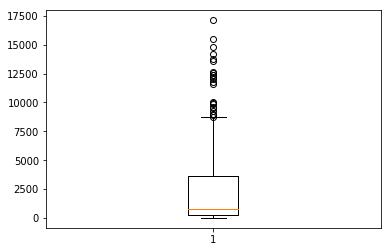

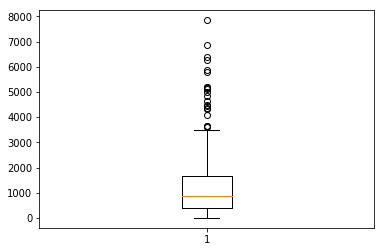

In [139]:
for n in df1.columns:
    plt.boxplot(df1[n]);
    plt.show();

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler(feature_range=(1000,10000))

In [15]:
scaled = scaler.fit_transform(X)  

In [16]:
df2scaled = pd.DataFrame(data=scaled,columns=df1.columns)

In [17]:
df2scaled.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,3904.545455,1962.796301,1703.557768,1771.036954,1450.699927,1634.588444,1285.707845
std,4212.464125,1014.962013,904.421042,921.871428,718.099730,1051.114296,529.431653
min,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,1000.000000,1250.764615,1181.120052,1208.564623,1106.095096,1055.941358,1076.079474
50%,1000.000000,1682.214574,1437.727217,1461.024823,1222.026823,1179.343034,1180.694618
75%,10000.000000,2358.711257,1874.382174,2033.389202,1522.044080,1863.977072,1341.160826
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


In [46]:
#df1 is scaled by formula while df2 is normalized by min max scaling 

In [146]:
df1scale = scaler.fit_transform(df1)

In [147]:
df1scaled

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10000.0,3323.562984,4348.277599,2955.273219,1100.686634,2404.393293,2532.330060
1,10000.0,2294.048104,4401.983958,3474.489063,1925.358115,2729.859204,3035.072057
2,10000.0,2164.900122,4052.543883,2987.093622,2267.905765,2847.111059,10000.000000
3,1000.0,3432.898492,1397.915294,2091.206991,4398.307091,1264.999708,3048.845810
4,10000.0,5148.145128,2867.516565,2861.364224,3072.333373,1932.756908,6947.965821
5,10000.0,2726.253567,3861.084202,2325.332720,1341.482183,1942.221184,2662.032904
6,10000.0,3223.950265,2096.446701,2803.673575,1242.393749,2649.412864,1622.114526
7,10000.0,2389.808398,2709.187430,3437.753313,1875.813898,2744.581410,3941.844153
8,1000.0,2093.355075,2253.032123,2601.109546,1213.093406,1900.683531,1857.416146
9,10000.0,2101.243375,4849.420700,5883.785104,1604.119806,4902.436175,3404.667772


In [49]:
df1scaled = pd.DataFrame(data=df1scaled,columns=df1.columns)

In [142]:
df1scaled.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,3826.086957,2964.509297,2679.865254,2762.033726,2345.098080,2246.336594,2417.479470
std,4182.136073,1801.324089,1588.754598,1670.224681,1553.814938,1687.116386,1397.346316
min,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,1000.000000,1561.399307,1496.173519,1546.638305,1347.209068,1131.316820,1449.942609
50%,1000.000000,2474.378312,2211.880498,2170.628647,1757.547058,1404.334872,2007.779620
75%,10000.000000,3871.708113,3390.107335,3524.742016,2693.693027,2923.088158,2926.890703
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


In [ ]:
#winsorizing (outlier handling)

In [19]:
from scipy.stats.mstats import winsorize

In [20]:
df1winsor = winsorize(df1scale)

NameError: name 'df1scale' is not defined

In [149]:
df1win =pd.DataFrame(data=df1winsor,columns=df1.columns)

In [150]:
df1win.describe()          #scaled with outlier removal and then winsorized 

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,3826.086957,2964.509297,2679.865254,2762.033726,2345.098080,2246.336594,2417.479470
std,4182.136073,1801.324089,1588.754598,1670.224681,1553.814938,1687.116386,1397.346316
min,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,1000.000000,1561.399307,1496.173519,1546.638305,1347.209068,1131.316820,1449.942609
50%,1000.000000,2474.378312,2211.880498,2170.628647,1757.547058,1404.334872,2007.779620
75%,10000.000000,3871.708113,3390.107335,3524.742016,2693.693027,2923.088158,2926.890703
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


In [21]:
df2winsor = winsorize(scaled)

In [22]:
df2win =pd.DataFrame(data=df2winsor,columns=df1.columns)

In [23]:
df2win.describe()     # no value removal yet normalized and winsorized 

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,3904.545455,1962.796301,1703.557768,1771.036954,1450.699927,1634.588444,1285.707845
std,4212.464125,1014.962013,904.421042,921.871428,718.099730,1051.114296,529.431653
min,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
25%,1000.000000,1250.764615,1181.120052,1208.564623,1106.095096,1055.941358,1076.079474
50%,1000.000000,1682.214574,1437.727217,1461.024823,1222.026823,1179.343034,1180.694618
75%,10000.000000,2358.711257,1874.382174,2033.389202,1522.044080,1863.977072,1341.160826
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000


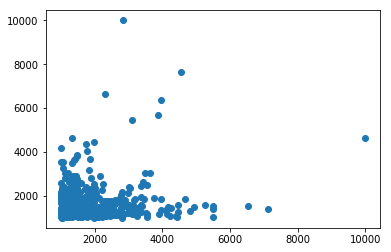

In [69]:
plt.scatter('Fresh','Milk',data=df2win)
plt.show()

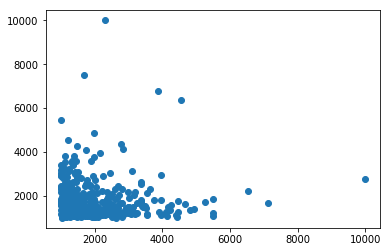

In [70]:
plt.scatter('Fresh','Grocery',data=df2win)
plt.show()

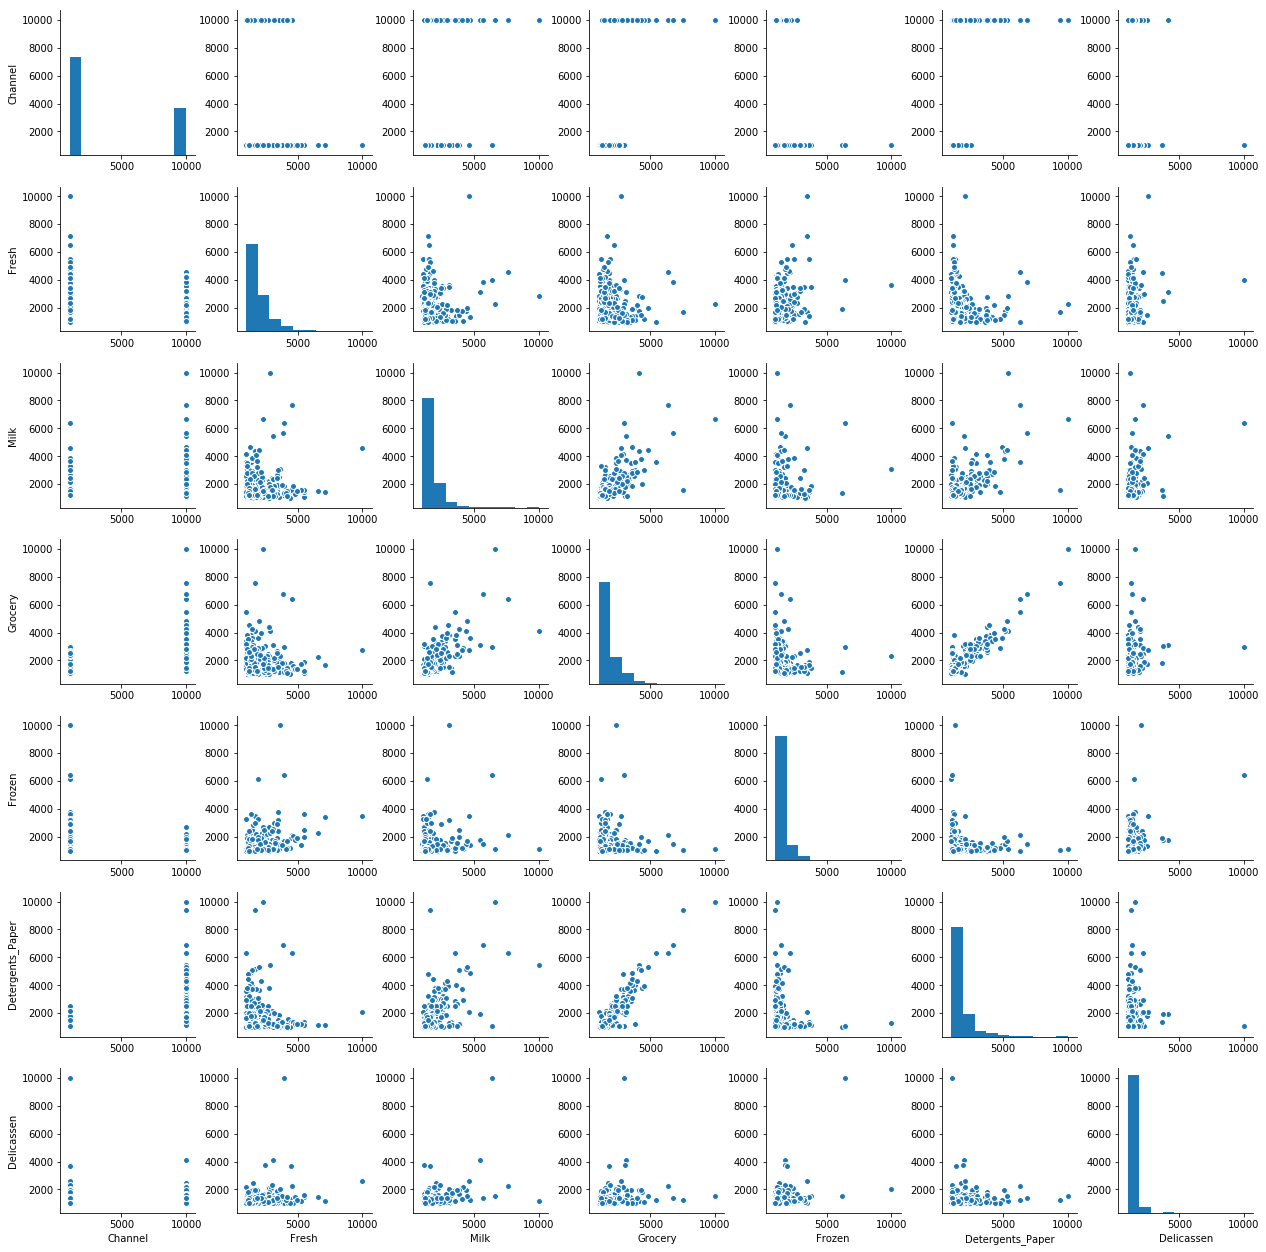

In [417]:
sns.pairplot(df2win,diag_kind='hist')

In [75]:
# lets compare the two preprocessed datasets to get the accuracy of the model 

In [248]:
raw_data['Region'].replace([1,2,3],[0,1,2],inplace=True)

In [249]:
x = df2win
y = raw_data['Region']

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8,random_state=42)

In [185]:
#knn 

In [306]:
neigh = KNeighborsClassifier(n_neighbors=7)

In [307]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [308]:
predd = neigh.predict(x_test)

In [309]:
accuracy_score(y_test,predd)

0.77272727272727271

In [310]:
confusion_matrix(y_test,predd)

array([[ 0,  0,  9],
       [ 0,  0,  5],
       [ 5,  1, 68]], dtype=int64)

In [284]:
# neural net 

In [285]:
mlpn = MLPClassifier()

In [252]:
mlpn.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [257]:
predn = mlpn.predict(x_test)

In [258]:
accuracy_score(y_test,predn)

0.71590909090909094

In [259]:
confusion_matrix(y_test,predn)

array([[ 0,  0,  9],
       [ 0,  0,  5],
       [ 2,  9, 63]], dtype=int64)

In [260]:
mean_squared_error(y_test,predn)

0.65909090909090906

In [226]:
#svc

In [199]:
clfwin = SVC()

In [200]:
clfwin.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [201]:
predc = clfwin.predict(x_test)

In [202]:
accuracy_score(y_test,predc) #highest accuracy obtained for region classification

0.84090909090909094

In [203]:
confusion_matrix(y_test,predc)

array([[ 0,  0,  9],
       [ 0,  0,  5],
       [ 0,  0, 74]], dtype=int64)

In [204]:
mean_squared_error(y_test,predc)

0.46590909090909088

In [151]:
# ------ checking with df1 win table -------

In [152]:
x1 = df1win
y1 = df1y

In [173]:
x1_train, x1_test, y1_train, y1_test = train_test_split( x1, y1, test_size=0.3,random_state=42)

In [174]:
#knn 

In [175]:
neighdf1 = KNeighborsClassifier()

In [176]:
neighdf1.fit(x1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [177]:
y1pred = neighdf1.predict(x1_test)

In [178]:
accuracy_score(y1_test,y1pred)

0.68000000000000005

In [179]:
#svc

In [180]:
clfdf1 = SVC()

In [181]:
clfdf1.fit(x1_train,y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [182]:
y1predc = clfdf1.predict(x1_test)

In [183]:
accuracy_score(y1_test,y1predc)

0.76000000000000001

In [ ]:
# so df2win is giving max accuracy obtained for the values instead of deleting values . normalizing is better 

In [334]:
# ensemble methods 

In [345]:
from sklearn.ensemble import GradientBoostingClassifier

In [346]:
ada = GradientBoostingClassifier()

In [347]:
ada.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [348]:
enpredic = ada.predict(x_test)

In [349]:
accuracy_score(y_test,enpredic)

0.80681818181818177

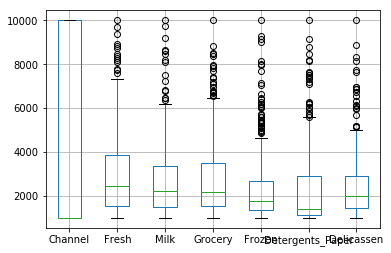

In [381]:
df1win.boxplot()

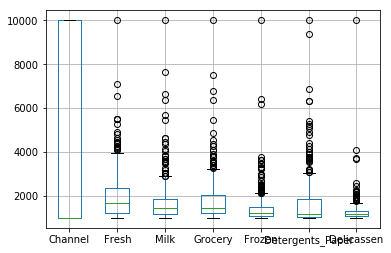

In [382]:
df2win.boxplot()

In [383]:
scalerdf = MinMaxScaler(feature_range=(0,1))

In [385]:
df10wind = scalerdf.fit_transform(df1win)

In [386]:
df10win =pd.DataFrame(data=df10wind,columns=df1.columns)

In [388]:
x10 = df10win
y10 = df1y

In [390]:
x10_train, x10_test, y10_train, y10_test = train_test_split( x10, y10, test_size=0.3,random_state=42)

In [391]:
clfdf10 = SVC()
clfdf10.fit(x10_train,y10_train)
y10predc = clfdf1.predict(x10_test)

In [392]:
accuracy_score(y10_test,y10predc)   # changing the range of the values doesnt improve the accuracy (tested with df1win[0-1])

0.76000000000000001

In [393]:
from sklearn.preprocessing import KernelCenterer

In [394]:
kel = KernelCenterer()

In [397]:
k = kel.fit_transform(df10win)

In [398]:
k10 =pd.DataFrame(data=k,columns=df1.columns)

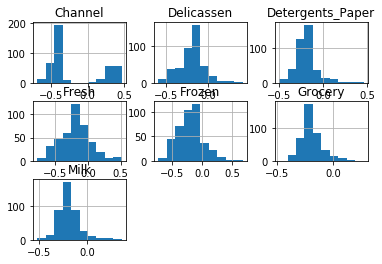

In [416]:
k10.hist();

In [404]:
xk = k10
yk = df1y
xk_train, xk_test, yk_train, yk_test = train_test_split( xk, yk, test_size=0.3,random_state=42)
clfdfk = SVC()
clfdfk.fit(xk_train,yk_train)
ykpredc = clfdfk.predict(xk_test)


In [406]:
accuracy_score(yk_test,ykpredc)  # centering around the gaussian doesnt improve the accuracy .

0.76000000000000001

In [407]:
# feature generation is not possible in the given dataset since all are numerical 


In [1]:
#clustering algorithms 

In [25]:
from sklearn.cluster import KMeans

In [45]:
from sklearn.decomposition import PCA

In [78]:
#dropped the channel column which has extreme values 

In [269]:
x = df2win.iloc[:, [ 1, 2, 3, 4, 5, 6]].values

In [270]:
#visualizing the number of clusters needed 

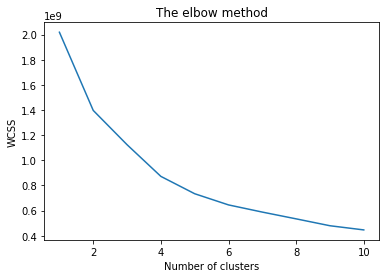

In [271]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [278]:
kmeans = KMeans(n_clusters= 3)
#to avoid overfitting of the dataset we are using the number 4 

In [279]:
y_kmeans = kmeans.fit_predict(x)

In [280]:
 print ("Accuracy is ", accuracy_score(y,y_kmeans)*100) # checking the accuracy of the model 

Accuracy is  59.5454545455


In [1]:
x

NameError: name 'x' is not defined

In [276]:
# visualizing the clusters 

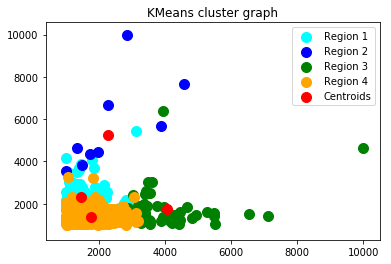

In [277]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Region 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Region 2 ')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Region 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Region 4')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title("KMeans cluster graph")
plt.legend()